In [62]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.stats import norm
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# setting seriefs fontstyle
plt.rcParams['font.family'] = 'serif'

# setting matplotlib style
plt.style.use('seaborn-whitegrid')

MovieWriter ffmpeg unavailable; using Pillow instead.


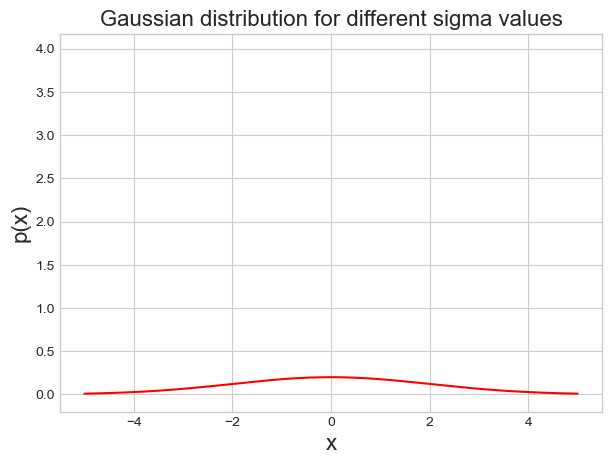

In [3]:
# animating 1D gaussian distribution for different sigma values

def gaussian_1D(x, mu, sigma):
    # normalized gaussian distribution using scipy
    return norm.pdf(x, mu, sigma)

# array of sigma values
sigma = np.linspace(0.1, 2, 100)

#creating figure for animation
x = np.linspace(-5, 5, 500)
y = gaussian_1D(x, 0, sigma[0])
fig = plt.figure(figsize=(7,5), dpi=100)
ln, = plt.plot(x,y, 'r-')
plt.xlabel('x', fontsize=16)
plt.ylabel('p(x)', fontsize=16)
plt.title('Gaussian distribution for different sigma values', fontsize=16)

# creating function for animation
def animate(i):
    x = np.linspace(-5, 5, 500)
    y = gaussian_1D(x, 0, sigma[i])
    ln.set_data(x, y)
    return ln,

# defining init function
def init():
    x = np.linspace(-5, 5, 500)
    y = gaussian_1D(x, 0, sigma[0])
    ln.set_data(x, y)
    return ln,

# creating animation with blit=True and interval=50
anim = FuncAnimation(fig, animate, init_func=init, frames=len(sigma), interval=100, blit=True)
#

# saving animation at 24fps
anim.save('gaussian_1D.gif', fps=24, dpi=100)


MovieWriter ffmpeg unavailable; using Pillow instead.


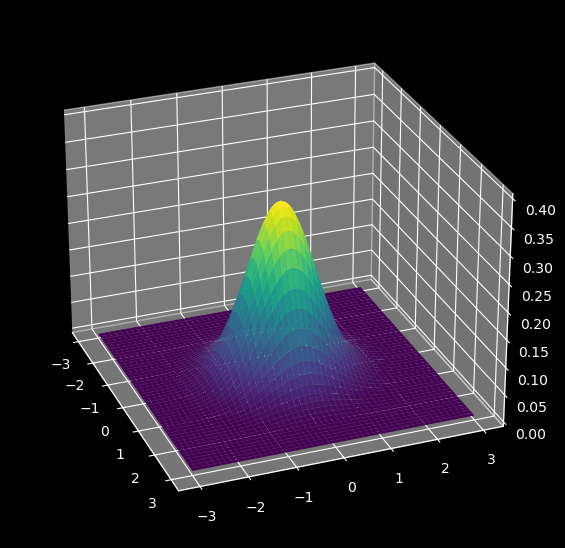

In [80]:
# animating 2D gaussian distribution for different sigma values
frn = 200
fps = 24

# array of covariance values
# changing the spread along x and y axis
x_change = np.linspace(0.5, 1, 200)
y_change = np.linspace(0.5, 1, 200)

# creating covariance matrix for different sigma values
cov = np.array([[[x_change[i], 0], [0, y_change[i]]] for i in range(len(x_change))])

x = np.linspace(-3, 3, 500)
y = np.linspace(-3, 3, 500)
X,Y = np.meshgrid(x,y)

x1 = X.flatten()
y1 = Y.flatten()
xy = np.vstack((x1,y1)).T

# obtaining 2D gaussian distribution in the grid for different sigma values
Z_master = np.zeros((len(cov),500,500))
for i in range(len(cov)):
    Z_temp = multivariate_normal([0,0], cov[i])
    z = Z_temp.pdf(xy)
    z = z.reshape(500,500)
    Z_master[i] = z


# creating figure for animation
fig = plt.figure(figsize=(12,7), dpi=100)
ax = fig.add_subplot(111,projection='3d')
plot = [ax.plot_surface(X, Y, Z_master[0], cmap='viridis', edgecolor='none', antialiased=True)]
ax.set_zlim(0,0.4)
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.set_zlabel('p(x,y)', fontsize=16, rotation=0)
ax.view_init(27, -21)

# creating function for animation
def animate3D(i, Z_master, plot):
    plot[0].remove()
    plot[0] = ax.plot_surface(X, Y, Z_master[i], cmap='viridis', edgecolor='none')

# defining init function
def init3D():
    z = multivariate_normal([0,0], cov[0])
    X,Y = np.meshgrid(x,y)
    Z = z.pdf(xy)
    Z = Z.reshape(500,500)
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', antialiased=True)
    return surf

# creating animation with blit=True and interval=50
anim = FuncAnimation(fig, animate3D, frames=len(cov),fargs=(Z_master, plot), interval=frn/fps)

# saving animation at 30fps
anim.save('gaussian_2D.gif', fps=30, dpi=100)